In [2]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")


In [4]:
spam_or_ham = pd.read_csv("spam.csv", encoding='latin-1')[["label", "text"]]
spam_or_ham.columns = ["label", "text"]
spam_or_ham.head()


,label,text
0,ham,Dime algo. Esta bien.
1,ham,De acuerdo
2,ham,Mmm. ¿Traigo una botella de vino para entreten...
3,ham,Esta es tu prueba facial (1 2 3 4 5 6 7 8 9 <#...
4,ham,"Oye, iouri me dio tu número, soy Wylie, la ami..."


In [5]:
spam_or_ham["label"].value_counts()

ham     246
spam     46
Name: label, dtype: int64

In [6]:

import string
punctuation = set(string.punctuation)
def tokenize(sentence):
    tokens = []
    for token in sentence.split():
        new_token = []
        for character in token:
            if character not in punctuation:
                new_token.append(character.lower())
        if new_token:
            tokens.append("".join(new_token))
    return tokens


In [7]:
spam_or_ham.head()["text"].apply(tokenize)

0                             [dime, algo, esta, bien]
1                                        [de, acuerdo]
2    [mmm, ¿traigo, una, botella, de, vino, para, e...
3    [esta, es, tu, prueba, facial, 1, 2, 3, 4, 5, ...
4    [oye, iouri, me, dio, tu, número, soy, wylie, ...
Name: text, dtype: object

In [9]:

from sklearn.feature_extraction.text import CountVectorizer
demo_vectorizer = CountVectorizer(
    tokenizer = tokenize,
    binary = True
)

In [10]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_labels, test_labels = train_test_split(spam_or_ham["text"], spam_or_ham["label"], stratify=spam_or_ham["label"])
print(f"Training examples: {len(train_text)}, testing examples {len(test_text)}")

Training examples: 219, testing examples 73


In [11]:
real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)
train_X = real_vectorizer.fit_transform(train_text)
test_X = real_vectorizer.transform(test_text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [13]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(train_X, train_labels)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()

In [15]:

from sklearn.metrics import accuracy_score
predicciones = classifier.predict(test_X)
accuracy = accuracy_score(test_labels, predicciones)
print(f"Accuracy: {accuracy:.4%}")

Accuracy: 93.1507%


In [16]:
frases = [
  'Are you looking to redesign your website with new modern look and feel?',
  'Please send me a confirmation of complete and permanent erasure of the personal data',
  'You have been selected to win a FREE suscription to our service',
  'We’re contacting you because the webhook endpoint associated with your account in test mode has been failing',
  'Confirma tu cuenta de Facebook en el siguiente link',
  'You have been selected to participate in a free service'
]

In [17]:

frases_X = real_vectorizer.transform(frases)
predicciones = classifier.predict(frases_X)

In [18]:
for text, label in zip(frases, predicciones):
  print(f"{label:5} - {text}")

ham   - Are you looking to redesign your website with new modern look and feel?
ham   - Please send me a confirmation of complete and permanent erasure of the personal data
ham   - You have been selected to win a FREE suscription to our service
ham   - We’re contacting you because the webhook endpoint associated with your account in test mode has been failing
ham   - Confirma tu cuenta de Facebook en el siguiente link
ham   - You have been selected to participate in a free service


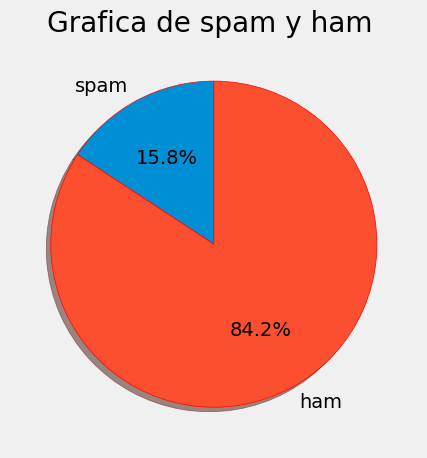

In [38]:

slices = [46, 246]

explode = [ 0, 0]

labels = ["spam", "ham"]
plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
         wedgeprops={"edgecolor": "#FF0000"})

plt.title('Grafica de spam y ham ')
plt.tight_layout()
plt.show()